In [10]:
from tensorflow import keras
import numpy as np
import keras_tuner as kt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Load the fashion MNIST


In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [16]:
x_Train = X_train.reshape(X_train.shape[0],-1)
scaler = StandardScaler().fit(x_Train)

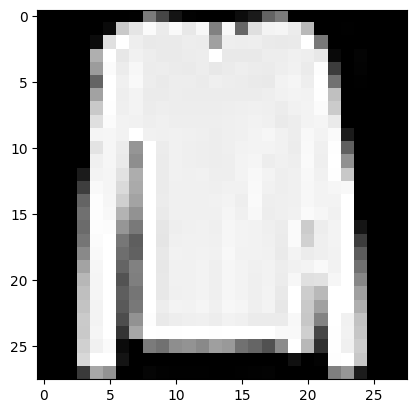

In [9]:
plt.imshow(X_train[np.random.randint(0, X_train.shape[0])], cmap='gray')

1. PCA


In [73]:
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (28, 28)


def plot_gallery(title, images, n_col=n_col, n_row=n_row, cmap=plt.cm.gray):
    fig, axs = plt.subplots(
        nrows=n_row,
        ncols=n_col,
        figsize=(2.0 * n_col, 2.3 * n_row),
        facecolor="white",
        constrained_layout=True,
    )
    fig.set_constrained_layout_pads(w_pad=0.01, h_pad=0.02, hspace=0, wspace=0)
    fig.set_edgecolor("black")
    fig.suptitle(title, size=16)
    for ax, vec in zip(axs.flat, images):
        vmax = max(vec.max(), -vec.min())
        im = ax.imshow(
            vec.reshape(image_shape),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        ax.axis("off")

    fig.colorbar(im, ax=axs, orientation="horizontal", shrink=0.99, aspect=40, pad=0.01)
    plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7232\362372807.py:23: RuntimeWarning: overflow encountered in scalar negative
  vmin=-vmax,


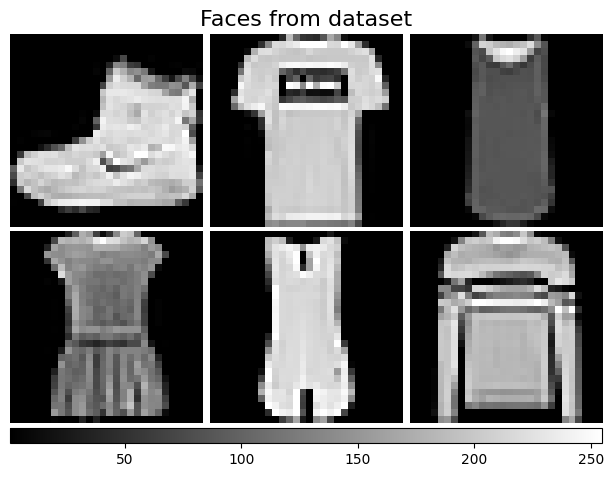

In [74]:
plot_gallery("Faces from dataset", x_Train[:n_components])

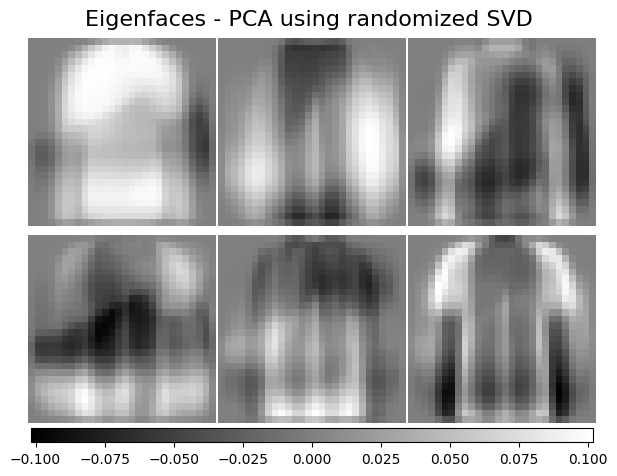

In [75]:
pca_estimator = PCA(
    n_components=n_components, svd_solver="randomized", whiten=True
)
pca_estimator.fit(x_Train)
plot_gallery(
    "Eigenfaces - PCA using randomized SVD", pca_estimator.components_[:n_components]
)

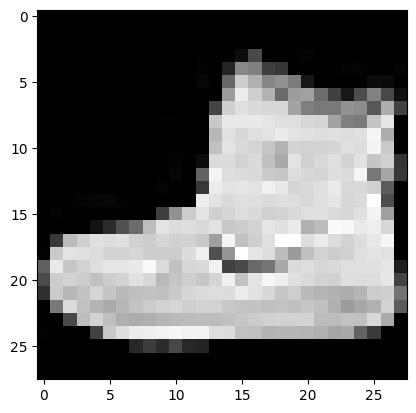

In [65]:
plt.imshow(x_Train[0].reshape(28,28), cmap='gray')

In [64]:
pca.components_.shape

(5, 784)

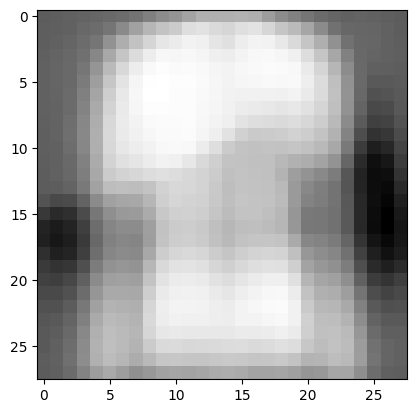

In [66]:
plt.imshow(pca.components_[0].reshape(28,28), cmap='gray')